In [1]:
import os
import csv
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from scipy.fft import fft, fftfreq
%matplotlib inline

In [38]:
# df1 = pd.read_excel('Coba Olah TGA.xlsx', 'VCF Atas 10')
# df2 = pd.read_excel('Coba Olah TGA.xlsx', 'VCF Atas 10_')

## input data

In [68]:
inputFolder0 = input('Masukkan Nama Input Folder : ')

tg=pd.DataFrame()
dtg=pd.DataFrame()
dta=pd.DataFrame()
namaFile0 = os.listdir('./'+inputFolder0)

for i in range(len(namaFile0)):
    namaFile0[i]=namaFile0[i].replace('.xlsx','')

Masukkan Nama Input Folder : TGA 40


## Data Processing

In [69]:
for nf in namaFile0:
    df2 = pd.read_excel('./'+inputFolder0+'/'+nf+'.xlsx','Sheet3')
    df2.drop(df2.iloc[:, 5:10], inplace = True, axis = 1)
    df2.columns=['Time (min)','Temp (oC)','DTA (uV/mg)','TG (%)','DTG (%/oC)']
    df2=df2.drop(df2.loc[0:20].index)
    tg['Temp (oC)']=df2['Temp (oC)']
    tg['TG '+nf+' (%)']=100+df2['TG (%)']
    dtg['Temp (oC)']=df2['Temp (oC)']
    dtg['DTG '+nf+' (%/oC)']=df2['DTG (%/oC)']
    dta['Temp (oC)']=df2['Temp (oC)']
    dta['DTA '+nf+' (uV/mg)']=df2['DTA (uV/mg)']

## Input Nama Gambar

In [74]:
gambarTGA = input('Masukkan Nama gambar TGA:')
gambarDTG = input('Masukkan Nama gambar DTG:')
gambarDTA = input('Masukkan Nama gambar DTA:')
gambarGabungan = input('Masukkan Nama gambar TG/DTA:')
# gambarRMS1 = input('Masukkan Nama gambar RMS:')
# gambarTHD1 = input('Masukkan Nama gambar THD:')
# gambarCross1 = input('Masukkan Nama gambar Cross Product:')
outputFolder = input('Masukkan nama folder tempat menyimpan data: ')
os.mkdir(outputFolder)

Masukkan Nama gambar TGA:TGA
Masukkan Nama gambar DTG:DTG
Masukkan Nama gambar DTA:DTA
Masukkan Nama gambar TG/DTA:TG/DTA
Masukkan nama folder tempat menyimpan data: TGA 40 olah


## TG Process

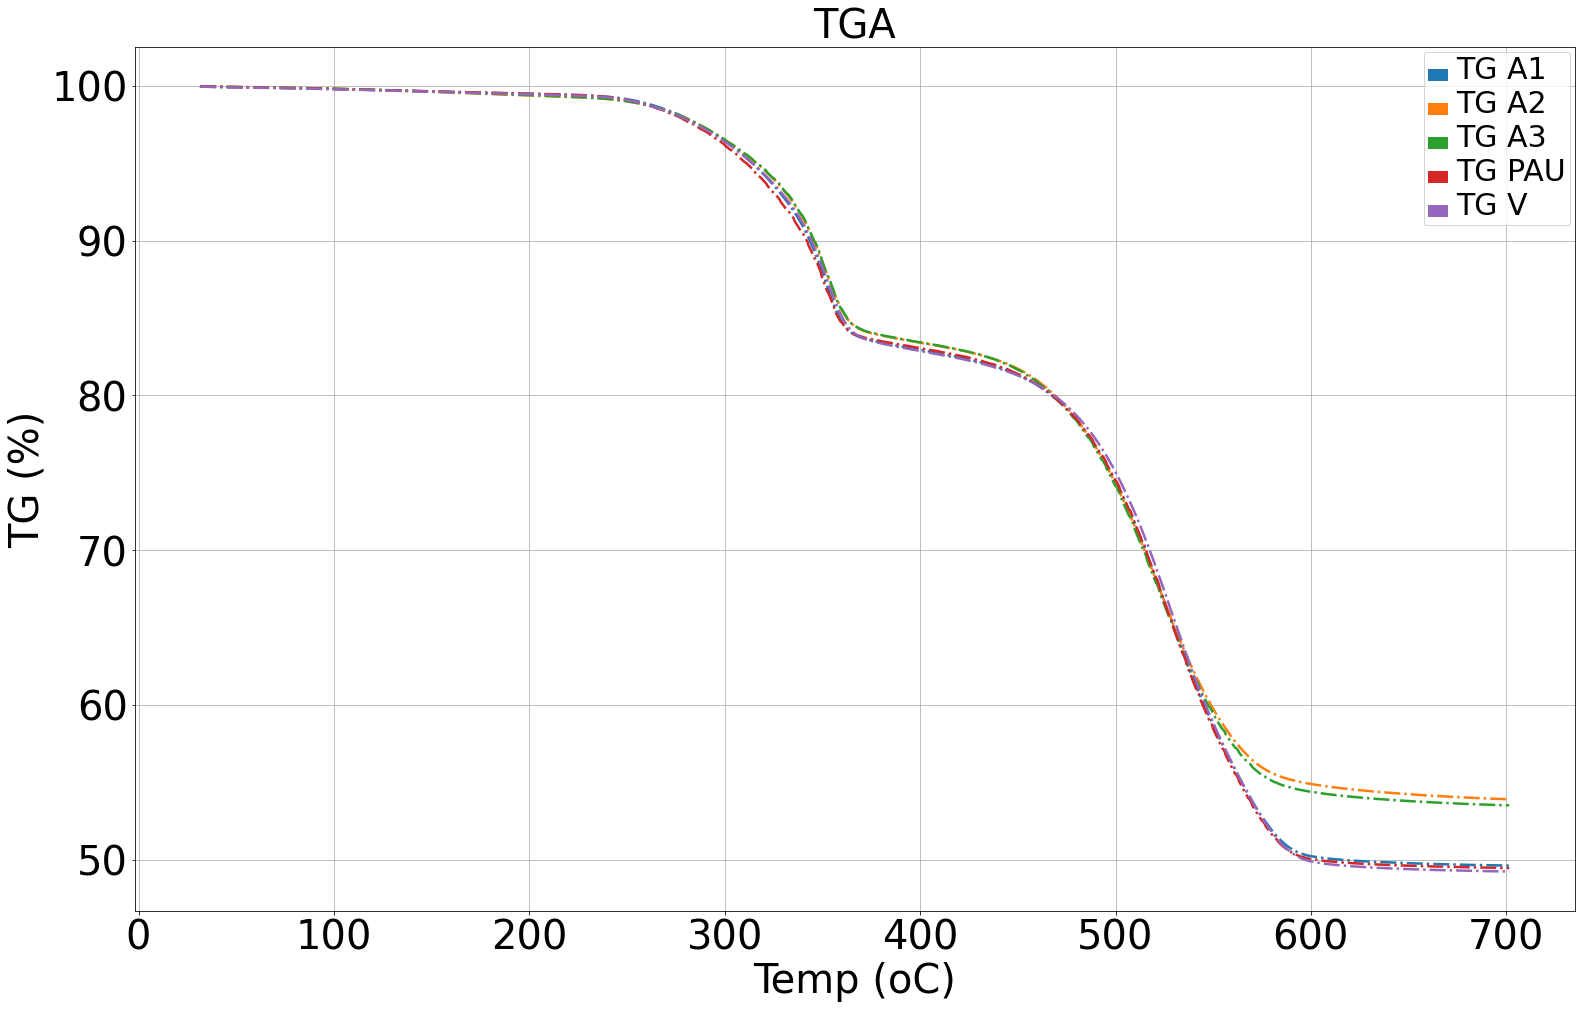

In [85]:
fig0 = plt.figure(figsize = (25,15))
fig0.subplots_adjust(right=0.75)
axes0 = fig0.add_axes([0.1,0.1,0.8,0.8])
i = 0


for nf in namaFile0:
    axes0.plot(tg['Temp (oC)'],tg['TG '+nf+' (%)'],label='TG '+nf,linewidth=2.5,ls='-.')

# axes0.set_xlim(None, 700)
# axes0.set_ylim(45, 102)

# axes0.legend()
# twin1.legend()
# twin2.legend()

axes0.set_title('TGA', fontsize = 40)
axes0.set_xlabel('Temp (oC)', fontsize = 40)
axes0.set_ylabel('TG (%)', fontsize = 40)
# axes0.set_ylim([0,650]) #Jangan Lupa Ganti
#axes.set_xlim([0,0.04])
#axes.set_xticks(np.linspace(0,0.04,16))

leg = axes0.legend()
# get the individual lines inside legend and set line width
for line in leg.get_lines():
    line.set_linewidth(12)
# get label texts inside legend and set font size
for text in leg.get_texts():
    text.set_fontsize(30)
    
for label in (axes0.get_xticklabels() + axes0.get_yticklabels()):
    label.set_fontsize(40)
    
axes0.grid()

In [86]:
fig0.savefig(fname='./'+outputFolder+'/'+gambarTGA,quality=100,dpi=200)

<ipython-input-86-6b0313322c8f>:1: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig0.savefig(fname='./'+outputFolder+'/'+gambarTGA,quality=100,dpi=200)


## DTG Process

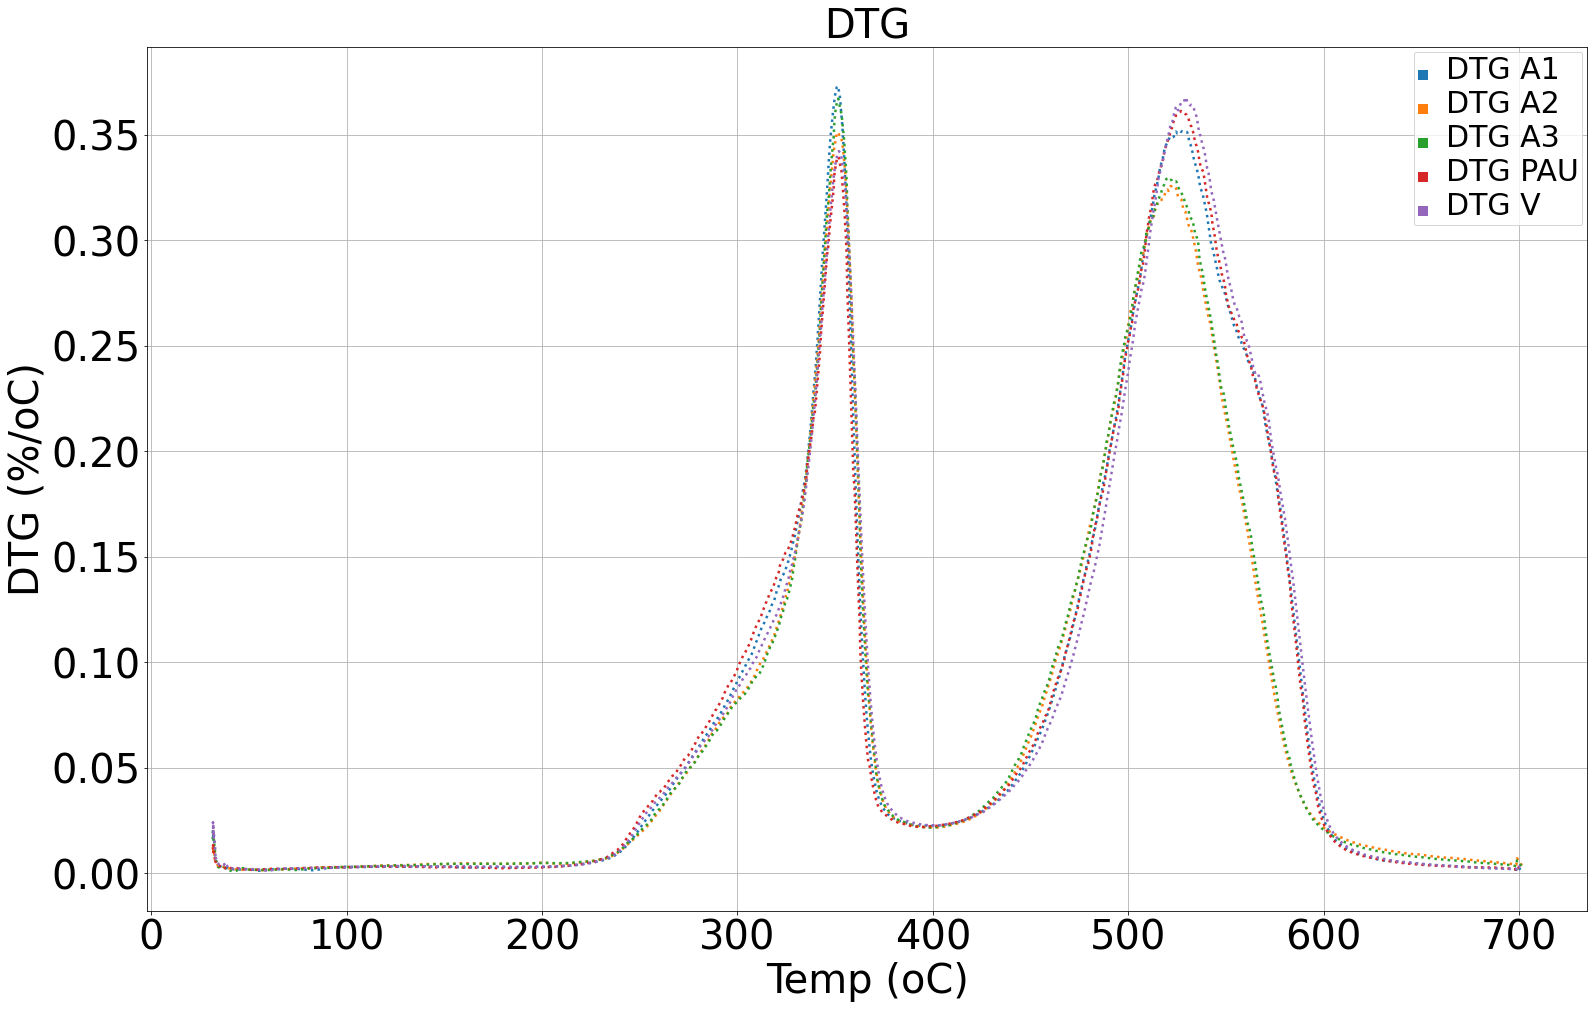

In [91]:
fig0 = plt.figure(figsize = (25,15))
fig0.subplots_adjust(right=0.75)
axes0 = fig0.add_axes([0.1,0.1,0.8,0.8])
i = 0


for nf in namaFile0:
    axes0.plot(dtg['Temp (oC)'],dtg['DTG '+nf+' (%/oC)'],label='DTG '+nf,linewidth=2.5,ls=':')

# axes0.set_xlim(None, 700)
# axes0.set_ylim(-0.01, None)

# axes0.legend()
# twin1.legend()
# twin2.legend()

axes0.set_title('DTG', fontsize = 40)
axes0.set_xlabel('Temp (oC)', fontsize = 40)
axes0.set_ylabel('DTG (%/oC)', fontsize = 40)
# axes0.set_ylim([0,650]) #Jangan Lupa Ganti
#axes.set_xlim([0,0.04])
#axes.set_xticks(np.linspace(0,0.04,16))

leg = axes0.legend()
# get the individual lines inside legend and set line width
for line in leg.get_lines():
    line.set_linewidth(10)
# get label texts inside legend and set font size
for text in leg.get_texts():
    text.set_fontsize(30)
    
for label in (axes0.get_xticklabels() + axes0.get_yticklabels()):
    label.set_fontsize(40)
    
axes0.grid()

In [92]:
fig0.savefig(fname='./'+outputFolder+'/'+gambarDTG,quality=100,dpi=200)

<ipython-input-92-5588f72f5437>:1: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig0.savefig(fname='./'+outputFolder+'/'+gambarDTG,quality=100,dpi=200)


## DTA Process

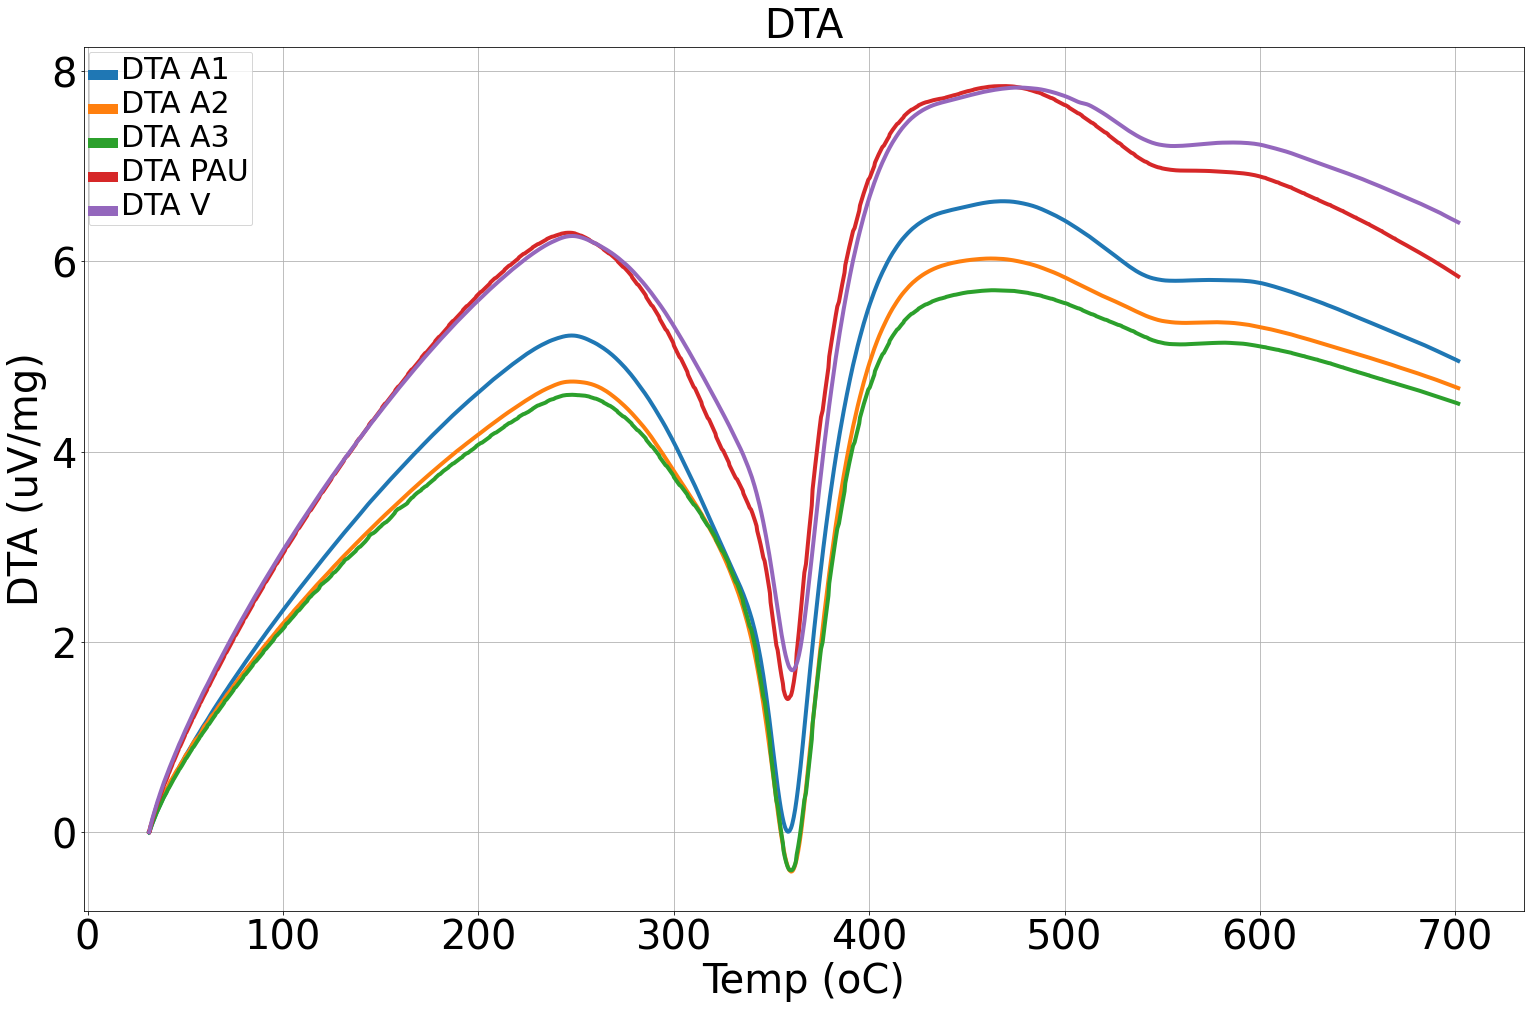

In [94]:
fig0 = plt.figure(figsize = (25,15))
fig0.subplots_adjust(right=0.75)
axes0 = fig0.add_axes([0.1,0.1,0.8,0.8])
i = 0


for nf in namaFile0:
    axes0.plot(dta['Temp (oC)'],dta['DTA '+nf+' (uV/mg)'],label='DTA '+nf,linewidth=4)

# axes0.set_xlim(None, 700)
# axes0.set_ylim(-0.2, None)

# axes0.legend()
# twin1.legend()
# twin2.legend()

axes0.set_title('DTA', fontsize = 40)
axes0.set_xlabel('Temp (oC)', fontsize = 40)
axes0.set_ylabel('DTA (uV/mg)', fontsize = 40)
# axes0.set_ylim([0,650]) #Jangan Lupa Ganti
#axes.set_xlim([0,0.04])
#axes.set_xticks(np.linspace(0,0.04,16))

leg = axes0.legend()
# get the individual lines inside legend and set line width
for line in leg.get_lines():
    line.set_linewidth(10)
# get label texts inside legend and set font size
for text in leg.get_texts():
    text.set_fontsize(30)
    
for label in (axes0.get_xticklabels() + axes0.get_yticklabels()):
    label.set_fontsize(40)
    
axes0.grid()

In [95]:
fig0.savefig(fname='./'+outputFolder+'/'+gambarDTA,quality=100,dpi=200)

<ipython-input-95-1624fefc0912>:1: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig0.savefig(fname='./'+outputFolder+'/'+gambarDTA,quality=100,dpi=200)


## TG/DTA Process

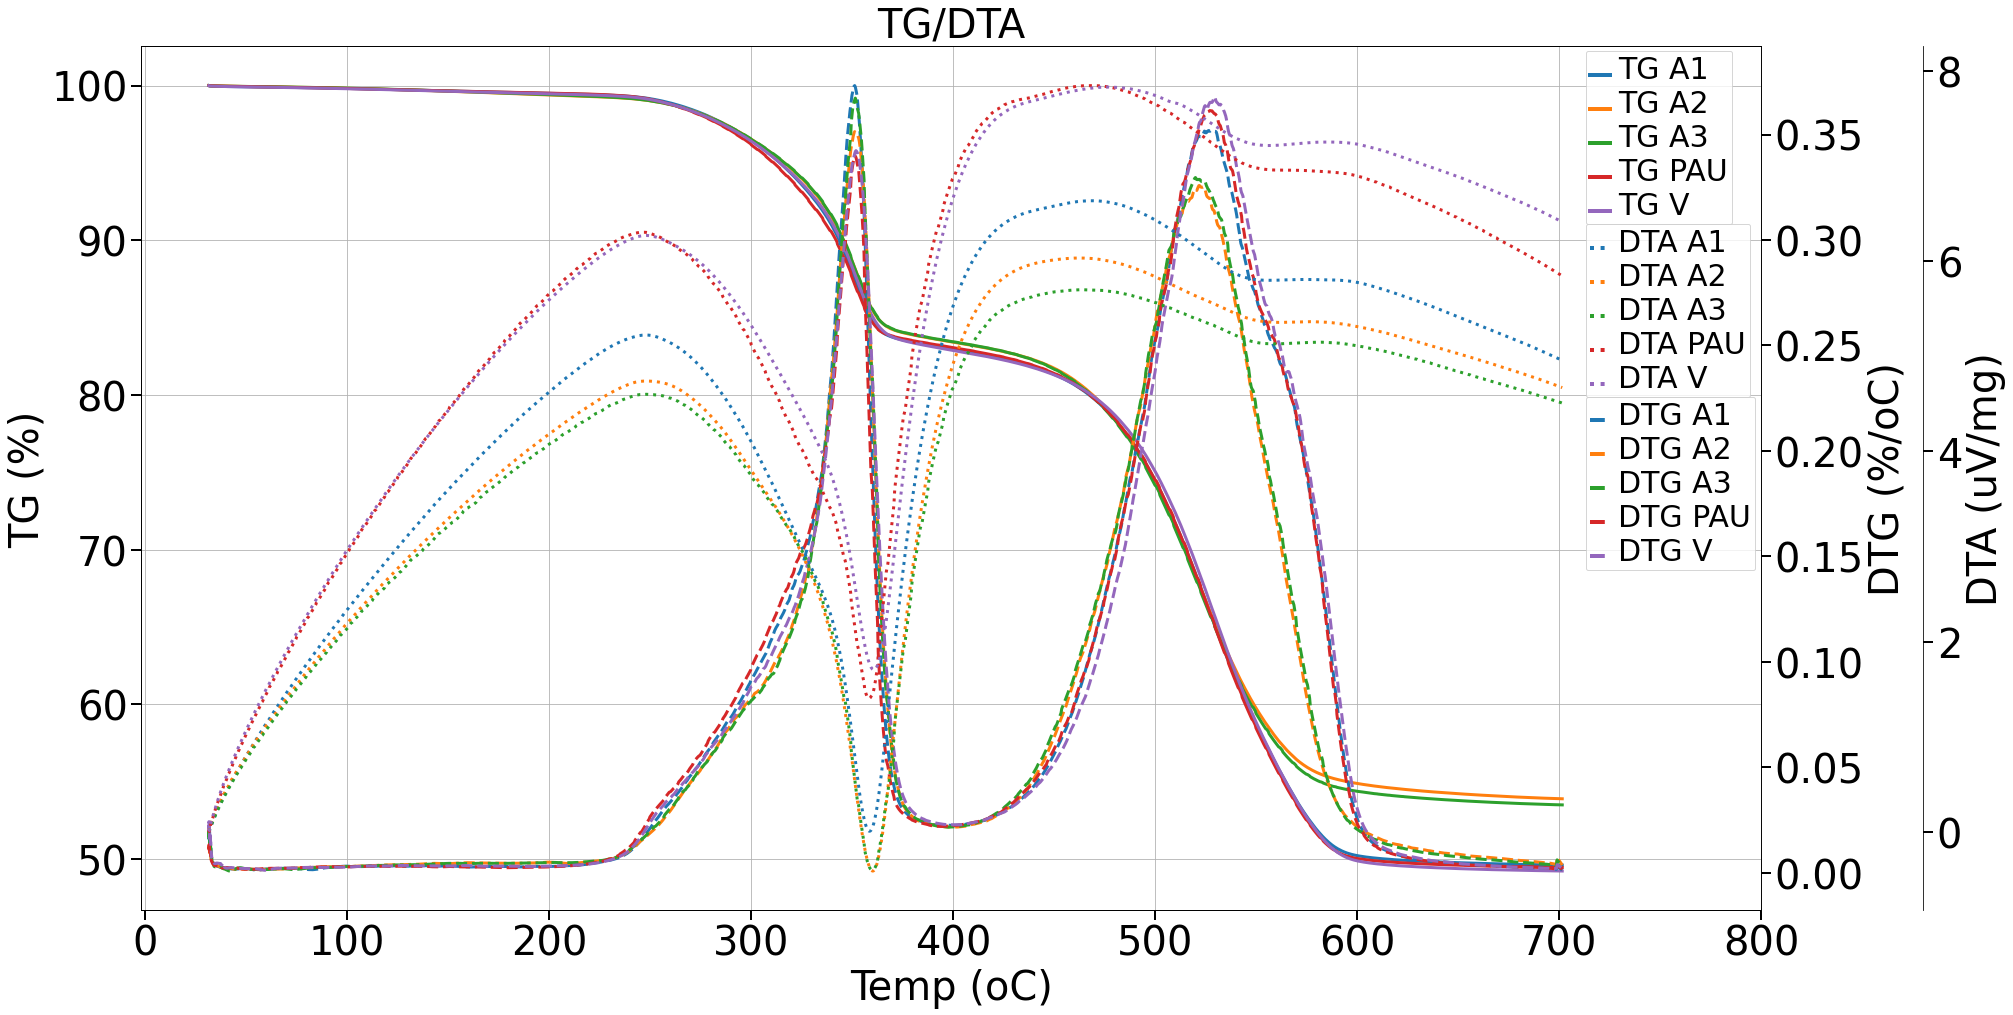

In [100]:
fig0 = plt.figure(figsize = (30,15))
fig0.subplots_adjust(right=0.75)
axes0 = fig0.add_axes([0.1,0.1,0.75,0.8])
i = 0
d1 = []
d2 = []
d3 = []

twin1 = axes0.twinx()
twin2 = axes0.twinx()

twin2.spines["right"].set_position(("axes", 1.1))
twin2.spines["right"].set_visible(True)

# twin2 = axes0.secondary_yaxis(1.2)


for nf in namaFile0:
    p1,=axes0.plot(tg['Temp (oC)'],tg['TG '+nf+' (%)'],label='TG '+nf,linewidth=3)
    d1.append(p1)
    p2,=twin1.plot(dtg['Temp (oC)'],dtg['DTG '+nf+' (%/oC)'],label='DTG '+nf,linewidth=3,ls='--')
    d2.append(p2)
    p3,=twin2.plot(dta['Temp (oC)'],dta['DTA '+nf+' (uV/mg)'],label='DTA '+nf,linewidth=3,ls=':')
    d3.append(p3)

axes0.set_xlim(None, 800)
# axes0.set_ylim(45, 102)
# twin1.set_ylim(-0.01, 0.45)
# twin2.set_ylim(-0.2, 15)

# axes0.legend()
# twin1.legend()
# twin2.legend()

axes0.set_title('TG/DTA', fontsize = 40)
axes0.set_xlabel('Temp (oC)', fontsize = 40)
axes0.set_ylabel('TG (%)', fontsize = 40)
twin1.set_ylabel('DTG (%/oC)', fontsize = 40)
twin2.set_ylabel('DTA (uV/mg)', fontsize = 40)
# axes0.set_ylim([0,650]) #Jangan Lupa Ganti
#axes.set_xlim([0,0.04])
#axes.set_xticks(np.linspace(0,0.04,16))

axes0.yaxis.label.set_color('black')
twin1.yaxis.label.set_color('black')
twin2.yaxis.label.set_color('black')

tkw = dict(size=10, width=2)
axes0.tick_params(axis='y', colors='black', **tkw)
twin1.tick_params(axis='y', colors='black', **tkw)
twin2.tick_params(axis='y', colors='black', **tkw)
axes0.tick_params(axis='x', **tkw)

# axes0.legend(handles=[p1, p2, p3])

leg = axes0.legend(loc=1, bbox_to_anchor=(0.985,1))
# get the individual lines inside legend and set line width
for line in leg.get_lines():
    line.set_linewidth(4)
# get label texts inside legend and set font size
for text in leg.get_texts():
    text.set_fontsize(30)

leg = twin2.legend(loc=1, bbox_to_anchor=(0.996,0.8))
# get the individual lines inside legend and set line width
for line in leg.get_lines():
    line.set_linewidth(4)
# get label texts inside legend and set font size
for text in leg.get_texts():
    text.set_fontsize(30)

leg = twin1.legend(loc=1, bbox_to_anchor=(0.999,0.6))
# get the individual lines inside legend and set line width
for line in leg.get_lines():
    line.set_linewidth(4)
# get label texts inside legend and set font size
for text in leg.get_texts():
    text.set_fontsize(30)
    
for label in (axes0.get_xticklabels() + axes0.get_yticklabels()):
    label.set_fontsize(40)
for label in (twin1.get_xticklabels() + twin1.get_yticklabels()):
    label.set_fontsize(40)
for label in (twin2.get_xticklabels() + twin2.get_yticklabels()):
    label.set_fontsize(40)
    
axes0.grid()

In [101]:
fig0.savefig(fname='./'+outputFolder+'/TGA Olah 40',quality=100,dpi=200)

<ipython-input-101-110631728f9a>:1: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig0.savefig(fname='./'+outputFolder+'/TGA Olah 40',quality=100,dpi=200)


In [102]:
tg.to_excel(excel_writer='./'+outputFolder+'/'+gambarTGA+ '.xlsx',index=False)
dtg.to_excel(excel_writer='./'+outputFolder+'/'+gambarDTG+'.xlsx',index=False)
dta.to_excel(excel_writer='./'+outputFolder+'/'+gambarDTA+'.xlsx',index=False)
